In [1]:
import os
import zlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

%matplotlib inline

In [2]:
def load_housing_data(path):
    csv_path = os.path.join(path, 'housing.csv')
    return pd.read_csv(csv_path)

In [3]:
housing_data = load_housing_data('C:/Users/unnikris/Desktop/DNN/ML Praac')
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

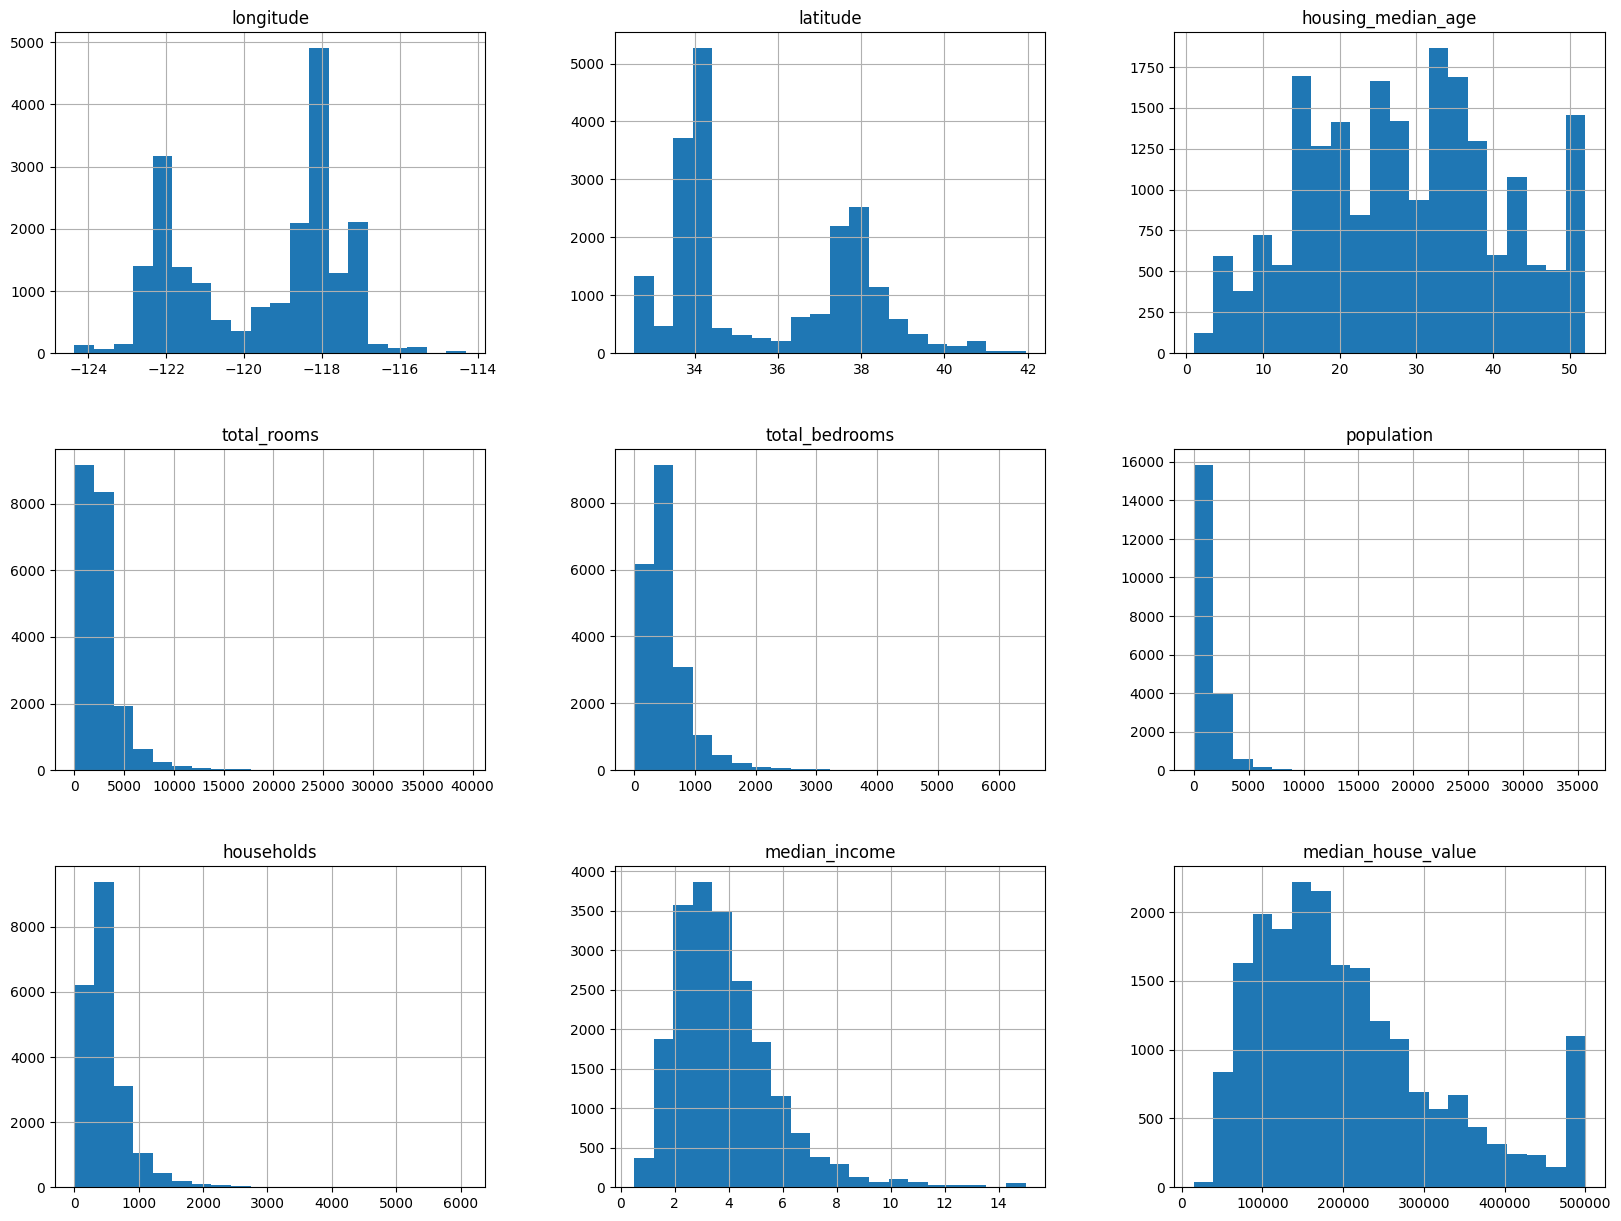

In [7]:
housing_data.hist(bins = 20, figsize=(20, 15))

## Creating a **Test-Train Split**

In [8]:
def train_test_split(data, split_size):
    shuffled_indexes = np.random.permutation(len(data))
    test_set_size = int(len(data)* split_size)
    test_indices = shuffled_indexes[:test_set_size]
    train_indices = shuffled_indexes[test_set_size:]
    return housing_data.iloc[test_indices], housing_data.iloc[train_indices]

In [9]:
test_set, train_set = train_test_split(housing_data, 0.2)
test_set, train_set

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 4691     -118.37     34.07                50.0       2519.0             NaN   
 7687     -118.10     33.95                34.0       3635.0           781.0   
 16071    -122.49     37.75                43.0       2044.0           393.0   
 16185    -121.30     37.95                 9.0        674.0           242.0   
 15440    -117.21     33.20                22.0       3337.0           518.0   
 ...          ...       ...                 ...          ...             ...   
 19076    -122.49     38.29                26.0       1726.0           289.0   
 15546    -117.09     33.10                21.0       2876.0           539.0   
 9417     -122.48     37.85                42.0       6297.0          1307.0   
 9509     -123.22     39.16                32.0       1149.0           187.0   
 11460    -117.99     33.67                15.0       3141.0           664.0   
 
        population  households  median

In [10]:
def test_set_check(identifier, test_ratio):
    return zlib.crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2 ** 32

In [11]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:test_set_check(id_,test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [12]:
housing_data['id'] = housing_data['longitude'] * 1000 + housing_data['latitude']


In [13]:
train_set, test_set = split_train_test_by_id(housing_data, 0.2, "id")

#### Pythonic way to do all the steps from cell 39

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)

In [16]:
train_set, test_set

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 14196    -117.03     32.71                33.0       3126.0           627.0   
 8267     -118.16     33.77                49.0       3382.0           787.0   
 17445    -120.48     34.66                 4.0       1897.0           331.0   
 14265    -117.11     32.69                36.0       1421.0           367.0   
 2271     -119.80     36.78                43.0       2382.0           431.0   
 ...          ...       ...                 ...          ...             ...   
 11284    -117.96     33.78                35.0       1330.0           201.0   
 11964    -117.43     34.02                33.0       3084.0           570.0   
 5390     -118.38     34.03                36.0       2101.0           569.0   
 860      -121.96     37.58                15.0       3575.0           597.0   
 15795    -122.42     37.77                52.0       4226.0          1315.0   
 
        population  households  median

In [17]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,-116997.29
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,-118126.23
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,-120445.34
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,-117077.31
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,-119763.22


#### Since median income being continous numerical attribue, Lets convert it into a categorical variable. So splitting them in 7 categories 

In [18]:
housing_data["income_category"] = pd.cut(housing_data['median_income'],
                                        bins = [0,1.5,3,4.5,6,7.5,9,np.inf],
                                        labels = [1,2,3,4,5,6,7])

In [19]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12,6
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14,6
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15,3


<AxesSubplot: xlabel='income_category', ylabel='Count'>

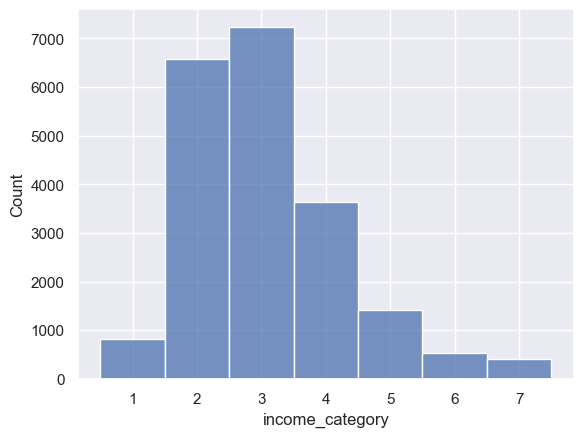

In [20]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
sns.histplot(housing_data['income_category'])

#### 👆 The above histogram tells us that majority of the citizens have an income that lies in between $15000 - $45000
#### 
#### Using stratified sampling instead of random sampling to have proportions to each income category(strata) 👇

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

In [22]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_data, housing_data['income_category']):
    strata_train_set = housing_data.loc[train_index]
    strata_test_set = housing_data.loc[test_index]

In [23]:
strata_test_set, "\n", strata_train_set

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 18446    -121.82     37.23                23.0       4487.0           584.0   
 17352    -120.42     34.89                24.0       2020.0           307.0   
 3505     -118.45     34.25                36.0       1453.0           270.0   
 7777     -118.10     33.91                35.0       1653.0           325.0   
 14155    -117.07     32.77                38.0       3779.0           614.0   
 ...          ...       ...                 ...          ...             ...   
 12182    -117.29     33.72                19.0       2248.0           427.0   
 7275     -118.24     33.99                33.0        885.0           294.0   
 17223    -119.72     34.44                43.0       1781.0           342.0   
 10786    -117.91     33.63                30.0       2071.0           412.0   
 3965     -118.56     34.19                36.0       2600.0           441.0   
 
        population  households  median

In [24]:
for set_ in (strata_train_set, strata_test_set):
    set_.drop('income_category', axis = 1, inplace = True)


In [25]:
strata_train_set.head(), strata_test_set.head()

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 12655    -121.46     38.52                29.0       3873.0           797.0   
 11038    -117.80     33.83                17.0       2971.0           350.0   
 2908     -119.04     35.37                44.0       1618.0           310.0   
 14053    -117.13     32.75                24.0       1877.0           519.0   
 20496    -118.70     34.28                27.0       3536.0           646.0   
 
        population  households  median_income  median_house_value  \
 12655      2237.0       706.0         2.1736             72100.0   
 11038      1180.0       346.0        11.1228            500001.0   
 2908        667.0       300.0         2.8750             82700.0   
 14053       898.0       483.0         2.2264            112500.0   
 20496      1837.0       580.0         4.4964            238300.0   
 
       ocean_proximity         id  
 12655          INLAND -121421.48  
 11038       <1H OCEAN -117766

In [26]:
housing = strata_train_set.copy()

In [27]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,-121421.48
11038,-117.80,33.83,17.0,2971.0,350.0,1180.0,346.0,11.1228,500001.0,<1H OCEAN,-117766.17
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,-119004.63
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,-117097.25
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,-118665.72


<AxesSubplot: xlabel='longitude', ylabel='latitude'>

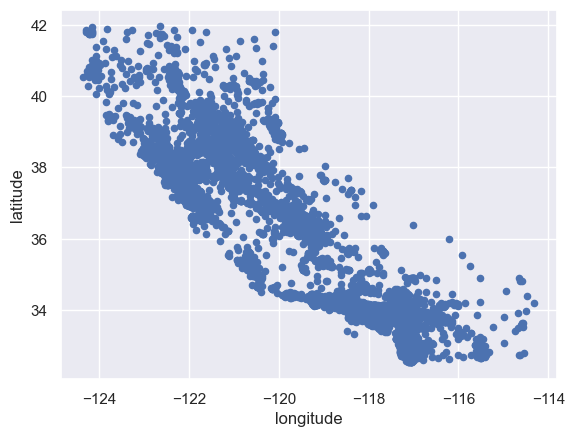

In [28]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude')

#### This scatter plot looks like California
#### 
#### To check the density of the plot areas {setting alpha = 0.1}

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

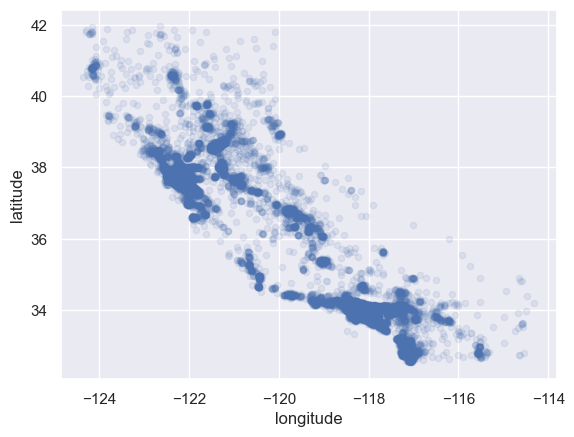

In [29]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1)

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

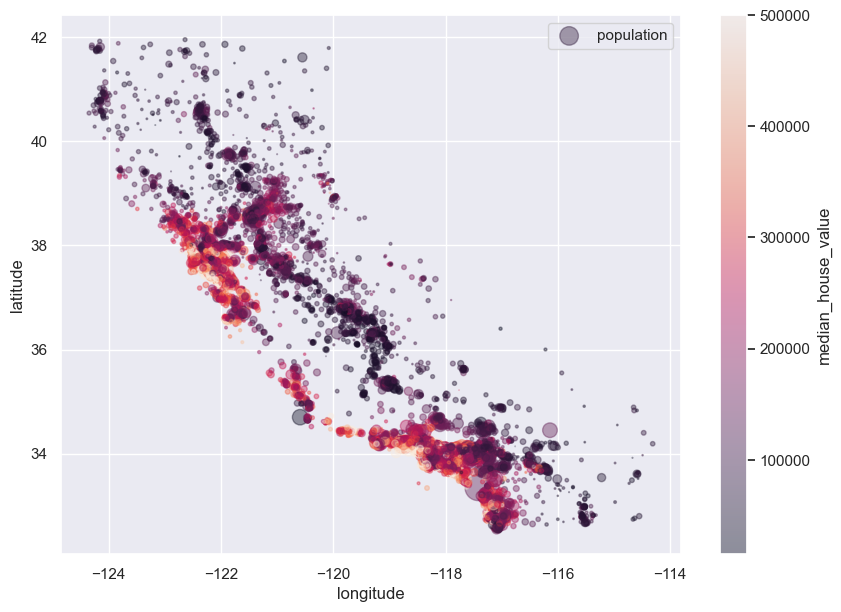

In [30]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4, 
            s = housing['population']/100, label = 'population', figsize =(10,7),
            c = 'median_house_value',cmap = plt.get_cmap('jet'), colorbar = True)

#### This clearly indicates most of the areas near the ocean are very high in value for housing
# 
#### Lets experiment and try to find other attributes which we can use

In [31]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

C:\Users\unnikris\AppData\Local\Temp\ipykernel_3176\2724363209.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.685978
total_rooms           0.136519
housing_median_age    0.111276
households            0.066461
total_bedrooms        0.049910
population           -0.024210
longitude            -0.045381
id                   -0.045580
latitude             -0.144304
Name: median_house_value, dtype: float64

In [32]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

#### The only promising attributes with a coorelation is 'median income' and 'median house value'

<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

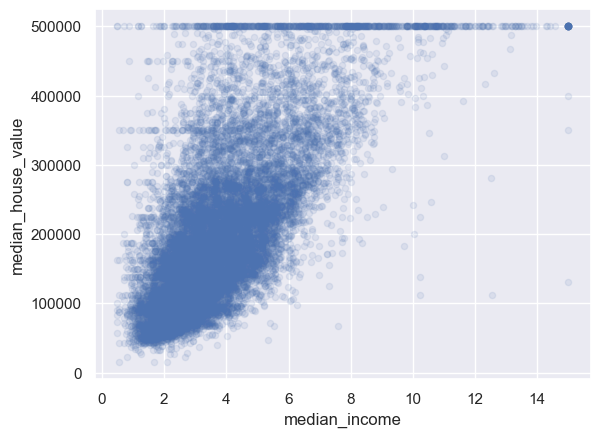

In [33]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha = 0.1)

#### *total number of rooms* in a district is not very useful if you don’t know how many households there are, but number of **rooms per household** would be usefull.
####  the *total number of bedrooms* by itself is not very useful, so **compare** it to the **total number of rooms**
####   Also **population per household** can be an insightful attribute too

In [34]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedroom_per_rooms'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [35]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,rooms_per_household,bedroom_per_rooms,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,-121421.48,5.485836,0.205784,3.168555
11038,-117.80,33.83,17.0,2971.0,350.0,1180.0,346.0,11.1228,500001.0,<1H OCEAN,-117766.17,8.586705,0.117805,3.410405
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,-119004.63,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,-117097.25,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,-118665.72,6.096552,0.182692,3.167241


In [36]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

C:\Users\unnikris\AppData\Local\Temp\ipykernel_3176\2724363209.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.685978
rooms_per_household         0.145185
total_rooms                 0.136519
housing_median_age          0.111276
households                  0.066461
total_bedrooms              0.049910
population_per_household   -0.021774
population                 -0.024210
longitude                  -0.045381
id                         -0.045580
latitude                   -0.144304
bedroom_per_rooms          -0.257992
Name: median_house_value, dtype: float64

## Preparing The Dataset

In [37]:
housing = strata_train_set.drop("median_house_value", axis=1)
housing_labels = strata_train_set['median_house_value'].copy() # creating a copy of the data set to make it easier to work with and can be dialed back if incase of errors

In [38]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,id
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,-121421.48
11038,-117.80,33.83,17.0,2971.0,350.0,1180.0,346.0,11.1228,<1H OCEAN,-117766.17
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND,-119004.63
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,-117097.25
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,-118665.72


In [39]:
housing_labels.head()

12655     72100.0
11038    500001.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

#### Checking for null values 👇

In [40]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
ocean_proximity         0
id                      0
dtype: int64

#### there are null values in the column total bedrooms, now there are 3 options deal with null values 
#### • Get rid of the corresponding districts.
#### • Get rid of the whole attribute.
#### • Set the values to some value (zero, the mean, the median, etc.).


In [41]:
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median, inplace = True)

In [42]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,id
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,-121421.48
11038,-117.80,33.83,17.0,2971.0,350.0,1180.0,346.0,11.1228,<1H OCEAN,-117766.17
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND,-119004.63
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,-117097.25
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,-118665.72


#### Better way to impute values in the rest of the dataset too in case of new values being added is to use sklearn's **SimpleImputer**

In [43]:
from sklearn.impute import SimpleImputer

In [44]:
imputer = SimpleImputer(strategy='median')

#### Drop text values, only numerical values can be used for median calculation

In [45]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [46]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,id
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,-121421.48
11038,-117.80,33.83,17.0,2971.0,350.0,1180.0,346.0,11.1228,-117766.17
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,-119004.63
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,-117097.25
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,-118665.72


In [47]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

#### 👆 trained imputer

In [48]:
X = imputer.transform(housing_num)
X

array([[-1.2146000e+02,  3.8520000e+01,  2.9000000e+01, ...,
         7.0600000e+02,  2.1736000e+00, -1.2142148e+05],
       [-1.1780000e+02,  3.3830000e+01,  1.7000000e+01, ...,
         3.4600000e+02,  1.1122800e+01, -1.1776617e+05],
       [-1.1904000e+02,  3.5370000e+01,  4.4000000e+01, ...,
         3.0000000e+02,  2.8750000e+00, -1.1900463e+05],
       ...,
       [-1.2272000e+02,  3.8440000e+01,  4.8000000e+01, ...,
         1.7200000e+02,  3.1797000e+00, -1.2268156e+05],
       [-1.2270000e+02,  3.8310000e+01,  1.4000000e+01, ...,
         5.0100000e+02,  4.1964000e+00, -1.2266169e+05],
       [-1.2214000e+02,  3.9970000e+01,  2.7000000e+01, ...,
         1.9700000e+02,  3.1319000e+00, -1.2210003e+05]])

#### to put 👆 result in a dataframe

In [49]:
housing_transform = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)
housing_transform.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
id                    0
dtype: int64

#### To convert text into categorical values ie into numbers

In [50]:
housing_category = housing[['ocean_proximity']]
housing_category.head(10)

,ocean_proximity
12655,INLAND
11038,<1H OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
1631,NEAR BAY
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [51]:
from sklearn.preprocessing import OrdinalEncoder

In [52]:
ordinal_encoder = OrdinalEncoder()
housing_category_encoded = ordinal_encoder.fit_transform(housing_category)
housing_category_encoded[:10]

array([[1.],
       [0.],
       [1.],
       [4.],
       [0.],
       [3.],
       [3.],
       [0.],
       [0.],
       [0.]])

#### to overcome the issue of ml algos assuming one category lets say 0 is close to 4. which in this case is not a viable option hence converting into **OneHotEncoding** ie. if '<1H OCEAN' == attribute then 1 otherwise 0 

In [53]:
from sklearn.preprocessing import OneHotEncoder

In [54]:
cat_encoder = OneHotEncoder()
housing_category_1hot = cat_encoder.fit_transform(housing_category)
housing_category_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

#### 👆 Converts attributes into numpy matrices with different non zero elements for different categorical aspects to reduce memory usage by storing zeros it only stores non zeros.. *example of matrix* 👇

In [55]:
housing_category_1hot.toarray()


array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [56]:
from sklearn.base import BaseEstimator, TransformerMixin

In [57]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y = None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix]/X[:, households_ix]
        population_per_household = X[:, population_ix]/X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [58]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attributes = attr_adder.transform(housing.values)

### This code defines a custom transformer class called "CombinedAttributesAdder" that adds three new attributes to the input data:

#### 1."rooms_per_household": the number of rooms per household
#### 2."population_per_household": the number of people per household
#### 3."bedrooms_per_room": the ratio of bedrooms to rooms (if the "add_bedrooms_per_room" parameter is set to True)

#### **The transformer takes a numpy array X as input in the "transform" method and returns a numpy array with the three new attributes added. The "fit" method does not do anything and simply returns the instance of the transformer.**

#### **The transformer takes an optional parameter "add_bedrooms_per_room" which, if set to True, adds the "bedrooms_per_room" attribute. If set to False, the transformer only adds the first two attributes.**

#### **The four variables defined at the beginning of the code (rooms_ix, bedrooms_ix, population_ix, households_ix) are the column indices of the input data corresponding to the number of rooms, number of bedrooms, population, and households respectively.**

## Feature Scaling
#### **Min-Max Scaler (Normalization)** --> MinMaxScaler --> affected by outliers
#### **Standardization** --> StandardScaler --> not affected by outliers

### Pipelining👇

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [60]:
num_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy="median")),
            ('attributes', CombinedAttributesAdder()),
            ('stdScaler', StandardScaler())
])

In [61]:
housing_num_transform = num_pipeline.fit_transform(housing_num)
housing_num_transform

array([[-0.94344449,  1.3501426 ,  0.02973199, ...,  0.01740782,
         0.00614618, -0.12111857],
       [ 0.88529653, -0.84475761, -0.92431095, ...,  1.20474104,
         0.02702276, -1.46925175],
       [ 0.26572307, -0.12404411,  1.22228566, ..., -0.01801164,
        -0.07544594, -0.3385447 ],
       ...,
       [-1.57301106,  1.31270294,  1.54029997, ..., -0.50922614,
        -0.03751172,  0.32343561],
       [-1.56301794,  1.25186349, -1.16282168, ...,  0.32816047,
        -0.05923111, -0.4574455 ],
       [-1.28321058,  2.02873648, -0.12927517, ...,  0.01408486,
         0.00649436, -0.12169426]])

In [62]:
from sklearn.compose import ColumnTransformer

In [63]:
num_attributes = list(housing_num)
cat_attributes = ['ocean_proximity']

full_pipeline = ColumnTransformer([
            ("num", num_pipeline, num_attributes),
            ("cat", OneHotEncoder(), cat_attributes),
])

housing_prepared = full_pipeline.fit_transform(housing) 

In [64]:
housing_prepared

array([[-0.94344449,  1.3501426 ,  0.02973199, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.88529653, -0.84475761, -0.92431095, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.26572307, -0.12404411,  1.22228566, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.57301106,  1.31270294,  1.54029997, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56301794,  1.25186349, -1.16282168, ...,  0.        ,
         0.        ,  0.        ],
       [-1.28321058,  2.02873648, -0.12927517, ...,  0.        ,
         0.        ,  0.        ]])

#### 👆 Preped , cleaned data to be put in a prediction model 👇

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [67]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_preped_data = full_pipeline.transform(some_data)
predictions = lin_reg.predict(some_preped_data)
labels = list(some_labels)
print("Predictions: ", predictions)
print("Labels: ", labels)


Predictions:  [ 85120.5   472088.75  152068.25  186605.75  244604.375]
Labels:  [72100.0, 500001.0, 82700.0, 112500.0, 238300.0]


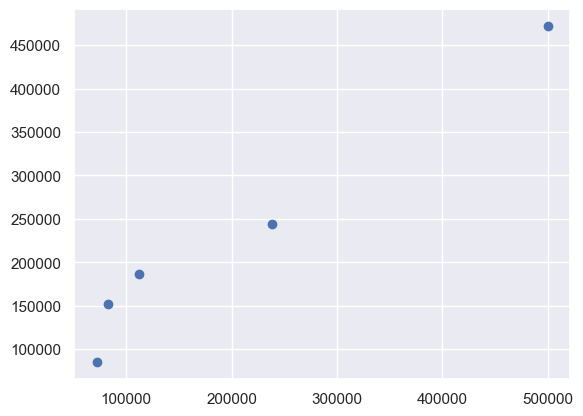

In [68]:
plt.scatter(labels,predictions)

#### To check error we use RMSE

In [69]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68616.89142170528

#### 👆Very high error rate, Hence trying with a more complex model👇

In [70]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [71]:
housing_predictions_destreereg = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions_destreereg)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

#### 👆 No error.. means the model has badly overfit the data so use **cross_val_score** to check the models performance

In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([72757.54796916, 68562.67934313, 71840.53832522, 70179.39885081,
       64987.85880674, 78499.24746841, 72142.87101523, 70809.64137553,
       70121.81649752, 75608.88915097])

In [74]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean of scores: ', scores.mean())
    print('SD of scores', scores.std())

In [75]:
display_scores(tree_rmse_scores)

Scores:  [72757.54796916 68562.67934313 71840.53832522 70179.39885081
 64987.85880674 78499.24746841 72142.87101523 70809.64137553
 70121.81649752 75608.88915097]
Mean of scores:  71551.04888027276
SD of scores 3508.7442118159756


#### 71613 is worse than linear regression

In [76]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [72174.01931391 64848.79001959 70442.94647643 69433.73958974
 65502.82818352 71186.59198408 69498.69477285 69658.45999073
 66526.03694387 70053.47115144]
Mean of scores:  68932.55784261753
SD of scores 2333.573203283838


#### Decision tree also gave a Very high error rate, Hence trying with an even more complex model👇

In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [79]:
housing_predictions_ranforestreg = forest_reg.predict(housing_prepared)

In [80]:
randomForest_scores = cross_val_score(forest_reg, housing_prepared,housing_labels, scoring = "neg_mean_squared_error", cv = 10)
randomForest_rmse_scores = np.sqrt(-randomForest_scores)


In [81]:
display_scores(randomForest_rmse_scores)

Scores:  [51318.57352832 49711.95759349 48609.52603023 51628.60667225
 46066.29903937 48735.6693106  52793.20113219 49050.84402848
 49490.68455122 54671.53678632]
Mean of scores:  50207.68986724659
SD of scores 2320.2175427471143


In [82]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3,10,3], 'max_features': [2,4,6,8]},
    {'bootstrap':[False], 'n_estimators': [3, 10], 'max_features': [2,3,4]}
]

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                        scoring = 'neg_mean_squared_error',
                        return_train_score = True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 3]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [83]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [84]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=10)

In [85]:
crves =grid_search.cv_results_


In [86]:
for mean_score, params in zip(crves['mean_test_score'], crves['params']):
    print(np.sqrt(-mean_score), params)

62023.269556158346 {'max_features': 2, 'n_estimators': 3}
53370.491478239506 {'max_features': 2, 'n_estimators': 10}
61461.47894024076 {'max_features': 2, 'n_estimators': 3}
58326.75515923235 {'max_features': 4, 'n_estimators': 3}
51315.6856938743 {'max_features': 4, 'n_estimators': 10}
58320.900612463396 {'max_features': 4, 'n_estimators': 3}
57619.79799630799 {'max_features': 6, 'n_estimators': 3}
50806.270456330945 {'max_features': 6, 'n_estimators': 10}
58591.749735073776 {'max_features': 6, 'n_estimators': 3}
57020.506808812046 {'max_features': 8, 'n_estimators': 3}
51596.7935304418 {'max_features': 8, 'n_estimators': 10}
57547.20337438994 {'max_features': 8, 'n_estimators': 3}
60377.529490043846 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
52325.880507516515 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
57528.89483105058 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
50736.24503877434 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

#### To understand best models and their errors

In [87]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([5.60022102e-02, 6.70033864e-02, 3.70198591e-02, 1.88398979e-02,
       1.86204940e-02, 1.91729285e-02, 1.84497748e-02, 2.81138266e-01,
       7.18243585e-02, 5.85037341e-02, 9.59615431e-02, 7.64042718e-02,
       4.50457099e-03, 1.70255376e-01, 6.51155320e-05, 2.16655264e-03,
       4.06766077e-03])

In [88]:
extra_attribs = ["rooms_per_household", "population_per_household", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attributes + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)

[(0.28113826558885685, 'median_income'),
 (0.17025537614458972, 'INLAND'),
 (0.09596154307786738, 'population_per_household'),
 (0.07640427176675862, 'bedrooms_per_room'),
 (0.07182435852182953, 'id'),
 (0.06700338644598908, 'latitude'),
 (0.05850373410568575, 'rooms_per_household'),
 (0.056002210173972465, 'longitude'),
 (0.037019859050270984, 'housing_median_age'),
 (0.019172928517959004, 'population'),
 (0.018839897851187996, 'total_rooms'),
 (0.01862049397434044, 'total_bedrooms'),
 (0.01844977484651049, 'households'),
 (0.004504570993241453, '<1H OCEAN'),
 (0.004067660768742728, 'NEAR OCEAN'),
 (0.0021665526402147276, 'NEAR BAY'),
 (6.511553198279885e-05, 'ISLAND')]

#### Now to evaluate the final model on the test set

In [89]:
final_model = grid_search.best_estimator_

In [90]:
X_test = strata_test_set.drop("median_house_value", axis=1)
y_test = strata_test_set['median_house_value'].copy()

In [91]:
X_test_prepared = full_pipeline.transform(X_test)

In [92]:
final_predictions = final_model.predict(X_test_prepared)
final_predictions

array([342100. , 223520.1, 206070. , ..., 428670.2, 248170. , 236700. ])

In [93]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48776.747172054944

#### Linear Regression               = Mean of scores:  68932.55784261753 SD of scores 2333.573203283838
#### Decision Tree                   = Mean of scores:  71613.32173975301 SD of scores 2963.8302412391017
#### Random Forest                   = Mean of scores:  50424.65454874036 SD of scores 2300.8260609141726
#### Random Forest with GridSearchCV = Best Score    :  46977.499719174295

In [94]:
from scipy import stats

In [95]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                        loc = squared_errors.mean(),
                        scale = stats.sem(squared_errors)))

array([46774.38669908, 50700.08755711])

In [96]:
joblib.dump(forest_reg, "my_model.pkl")

['my_model.pkl']

#### 👆 Save the model

#### Excersises

In [97]:
from sklearn.svm import SVR

In [98]:
support_vm = SVR(kernel="linear", C=2, gamma=1)

In [99]:
support_vm.fit(housing_prepared, housing_labels, )

SVR(C=2, gamma=1, kernel='linear')

In [100]:
housing_predictions_svm = support_vm.predict(housing_prepared)

In [101]:
scores_svm = cross_val_score(support_vm, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
svm_rmse = np.sqrt(-scores_svm)
display_scores(svm_rmse)

Scores:  [106498.69283746 105345.62690768 102814.56557787 109014.45076959
 102110.68013413 108178.458839   106197.80835187 104168.06507989
 104637.807019   106835.53634094]
Mean of scores:  105580.16918574343
SD of scores 2096.8910745790427


In [102]:
from sklearn.model_selection import RandomizedSearchCV

In [103]:
param_grid = [
    {'n_estimators': [3,10,3], 'max_features': [2,4,6,8]},
    {'bootstrap':[False], 'n_estimators': [3, 10], 'max_features': [2,3,4]}
]

rand_search = RandomizedSearchCV(forest_reg, param_grid, cv=5, 
                        scoring = 'neg_mean_squared_error',
                        return_train_score = True)

rand_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions=[{'max_features': [2, 4, 6, 8],
                                         'n_estimators': [3, 10, 3]},
                                        {'bootstrap': [False],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [3, 10]}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [104]:
rand_search.best_params_

{'n_estimators': 10, 'max_features': 8}

In [105]:
rand_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=10)

In [108]:
def top_indices(array, top_numbers):
    return np.sort(np.argpartition(np.array(array), -top_numbers)[-top_numbers:])
class Top_Feature_Selector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, top_numbers):
        self.feature_importances = feature_importances
        self.top_numbers = top_numbers
    def fit(self, X,y = None):
        self.feature_index = top_indices(self.feature_importances, self.top_numbers)
        return self
    def transform(self, X):
        return X[:, self.feature_index]

In [109]:
top_numbers = 6

In [111]:
top_index = top_indices(feature_importances, top_numbers)
top_index

array([ 1,  7,  8, 10, 11, 13], dtype=int64)

In [112]:
np.array(attributes)[top_index]

array(['latitude', 'median_income', 'id', 'population_per_household',
       'bedrooms_per_room', 'INLAND'], dtype='<U24')